# Chapter 2 Exercise 4

## Effect Size
Effect size: Used to describe the difference between two groups (size of the effect)

Cohen's D: Statistic used to compare the difference between groups to the variability within those groups

    d = (x1 - x2)/s
    This is the mean of each group divided by the "pooled standard deviation"

Note: .var() is in the numpy package

In [2]:
import numpy as np
import nsfg

In [25]:
import thinkstats2

In [27]:
import thinkplot

In [32]:
import math

In [37]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    print(diff)
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled = ((n1*var1) + (n2*var2))/(n1+n2)
    print(pooled)
    return diff/math.sqrt(pooled)

In [4]:
t = [0,1,1,2,3,4,4,0]

In [5]:
hist = {}
for x in t:
    hist[x] = hist.get(x,0)+1
# This is one way to generate a histagram. If the dictionary is empty for a certain key .get() will return 0 

In [6]:
hist

{0: 2, 1: 2, 2: 1, 3: 1, 4: 2}

In [7]:
preg = nsfg.ReadFemPreg()

In [8]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [9]:
live = preg[preg['outcome']==1]

In [14]:
live.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

In [16]:
live['pregordr'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 17])

In [18]:
live['birthord'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Note: Pregnancy doens't necessarily indicate live birth, so first babies are found under birth order

## Comparing Wgt in Lb of First Babies and Others

In [19]:
firsts = live[live['birthord']==1]
others = live[live['birthord']!=1]

In [26]:
hist1 = thinkstats2.Hist(firsts['totalwgt_lb'], label = 'first')
hist2 = thinkstats2.Hist(others['totalwgt_lb'], label = 'other')

In [39]:
CohenEffectSize(firsts['totalwgt_lb'], others['totalwgt_lb'])

-0.12476118453549034
1.979597467923158


-0.088672927072602

Looks like the difference is not much. 

Diff(means) = -0.124 meaning first babies are maybe 0.124 pounds lighter on average

Quite a bit of variance as shown by the pooled stdev

In [43]:
hist3 = thinkstats2.Hist(firsts['prglngth'], label = 'first')
hist4 = thinkstats2.Hist(others['prglngth'], label = 'other')

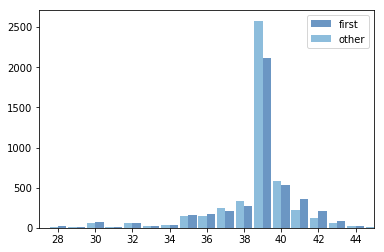

In [46]:
thinkplot.preplot(2)
thinkplot.Hist(hist3, align = 'left', width = 0.45)
thinkplot.Hist(hist4, align = 'right', width = 0.45)
thinkplot.Config(xlim = [27, 45])

In [47]:
CohenEffectSize(firsts['prglngth'], others['prglngth'])

0.07803726677754952
7.301943285975796


0.028879044654449883

The effect size is slightly smaller for pregnancy length